In [0]:
ffimport numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [0]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [0]:
X.shape, y.shape
y[0]

0

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [0]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [0]:
from sklearn import linear_model

In [0]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0001, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=15, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=2, warm_start=False)

In [0]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.76, NNZs: 15, Bias: -0.314605, T: 37500, Avg. loss: 0.455801
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.92, NNZs: 15, Bias: -0.469578, T: 75000, Avg. loss: 0.394737
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580452, T: 112500, Avg. loss: 0.385561
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.660824, T: 150000, Avg. loss: 0.382161
Total training time: 0.07 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.717218, T: 187500, Avg. loss: 0.380474
Total training time: 0.08 seconds.
-- Epoch 6
Norm: 1.06, NNZs: 15, Bias: -0.761816, T: 225000, Avg. loss: 0.379481
Total training time: 0.10 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.793932, T: 262500, Avg. loss: 0.379096
Total training time: 0.11 seconds.
-- Epoch 8
Norm: 1.07, NNZs: 15, Bias: -0.820446, T: 300000, Avg. loss: 0.378826
Total training time: 0.12 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.840093, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0001, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=15, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=2, warm_start=False)

In [0]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42328902,  0.18380407, -0.14437354,  0.34064016, -0.21316099,
          0.56702655, -0.44910569, -0.09094413,  0.21219292,  0.17750247,
          0.19931732, -0.00506998, -0.07781235,  0.33343476,  0.0320374 ]]),
 (1, 15),
 array([-0.85032916]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

In [0]:

from sklearn.metrics import log_loss
w = np.zeros_like(X_train[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N = len(X_train)
M=len(X_test)

def sigmod(x):
    if x<0:
        return 1-1/(1+math.exp(x))
    else:
        return 1/(1+math.exp(-x))
#print(len(inti_loss_train))
#print(prob[0])
prob1=[]
inti_loss_train1=[]
prob2=[]
inti_loss_test=[]
#print(len(y_train))

for i in range(N):
    #print(wt)
    #print(b)
    prob1.append(np.dot(w,X_train[i])+b)
#print(len(prob1))
for i in range(len(prob1)):
    #print(prob[i])
    inti_loss_train1.append(1 / (1 + sigmod(-prob[i])))
#print(len(inti_loss_train1))
#print(log_loss(y_train,inti_loss_train1,eps=0.0001))


k=0
for i in  range(N):
    k=k+(np.log(inti_loss_train1[i])*y_train[i])+(np.log(1-inti_loss_train1[i]))*(1-y_train[i])
log_loss_trian=-(k/N)
print("initial train loss",log_loss_trian)  


#calculating test set log loss
for i in range(M):
    prob2.append(np.dot(w,X_test[i])+b)
#print(prob[0])
for i in range(len(prob2)):
    
    inti_loss_test.append(1 / (1 + sigmod(-prob[i])))
#print(len(inti_loss_train))
k=0
for i in  range(M):
    k=k+(np.log(inti_loss_test[i])*y_test[i])+((np.log(1-inti_loss_test[i]))*(1-y_test[i]))
log_loss_test=-(k/M)
print("initial test loss",log_loss_test)
#print(log_loss(y_test,inti_loss_test,eps=0.0001))

initial train loss 0.8892079044398293
initial test loss 0.8897254543344142


In [0]:
import math

#for each epochs
train_loss=[]
test_loss=[]
prob3=[]
inti_loss_train2=[]
prob4=[]
inti_loss_test2=[]
for i in range(30) :
    
    prob3=[]
    inti_loss_train2=[]
    prob4=[]
    inti_loss_test2=[]
    for j in range(len(X_train)):#this is iteration
        prev=w
        wt=w.transpose
        s=np.dot(w,X_train[j])+b
        #print(s)
        g=(y_train[j]-sigmod(s))
        #print(g)
        #m=np.dot(X_train[j],g)
        #print(m)
        e=1-((alpha*eta0)/N)
        grad_w=np.dot(e,w)+(alpha*X_train[j]*g)
        grad_b=np.dot(e,b)+(alpha*g)
        #print(grad_b)
        w=grad_w
        b=grad_b
        
    #calculating train set log loss
    prev=[]
    prev.append(b)
    for i in range(N):
        #print(wt)
        #print(b)
        prob3.append(np.dot(w,X_train[i])+b)
        #print(prob[0])
    for i in range(len(prob3)):
        #print(prob[i])
        inti_loss_train2.append(1 / (1 + sigmod(-prob3[i])))
        #print(len(inti_loss_train))
    k=0
    for i in  range(N):
        k=k+(np.log(inti_loss_train2[i])*y_train[i])+(np.log(1-inti_loss_train2[i]))*(1-y_train[i])
    log_loss_trian2=-(k/N)
    train_loss.append(log_loss_trian2)
    #print(train_loss)
    #print("builtin",log_loss(y_train,inti_loss_train2,eps=0.0001))
   

    #calculating test set log loss
    for i in range(M):
        prob4.append(np.dot(w,X_test[i])+b)
    #print(prob[0])
    for i in range(len(prob4)):
    
        inti_loss_test2.append(1 / (1 + sigmod(-prob4[i])))
        #print(len(inti_loss_train))
    k=0
    for i in  range(M):
        k=k+(math.log(inti_loss_test2[i])*y_test[i])+((math.log(1-inti_loss_test2[i]))*(1-y_test[i]))
    log_loss_test3=-(k/M)
    test_loss.append(log_loss_test3)
    #print(test_loss)
    #print("builtin",log_loss(y_test,inti_loss_test2,eps=0.0001))

print(w)
print(b)

     


[-0.42976833  0.1930277  -0.1484608   0.33809373 -0.22124896  0.56993197
 -0.44518186 -0.08991042  0.22181549  0.17381499  0.19873573 -0.00057395
 -0.08132145  0.33908888  0.02298487]
-0.892100966834422


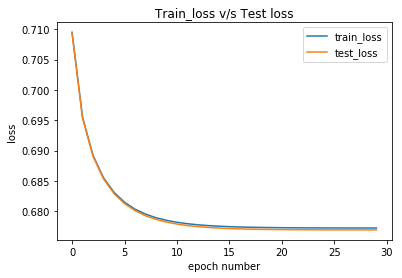

In [0]:
import matplotlib.pyplot as plt 
Y=[] 
for i in range(30):
    Y.append(i)

plt.plot(Y,train_loss,label='train_loss') 

plt.plot(Y,test_loss,label='test_loss') 
plt.legend()
# naming the x axis 
plt.xlabel('epoch number') 
# naming the y axis 
plt.ylabel('loss') 
  
# giving a title to my graph 
plt.title('Train_loss v/s Test loss') 
  
# function to show the plot 

plt.show()
 

In [0]:

w-clf.coef_, b-clf.intercept_

(array([[-0.00647931,  0.00922363, -0.00408725, -0.00254644, -0.00808798,
          0.00290542,  0.00392383,  0.0010337 ,  0.00962257, -0.00368748,
         -0.00058159,  0.00449603, -0.0035091 ,  0.00565411, -0.00905252]]),
 array([-0.04177181]))

In [0]:
def sigmod(x):
    if x<0:
        return 1-1/(1+math.exp(x))
    else:
        return 1/(1+math.exp(-x))
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        c=np.dot(w,X[i])+b
        if sigmod(c) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.9522133333333334
0.95
